In [37]:
import pickle
import numpy as np

In [38]:
# # load the pickle file
# with open('MindMNIST_bendr.pkl', 'rb') as f:
#     arrays = pickle.load(f)
#     digit_labels = pickle.load(f)

In [39]:
with open('MindMNIST.pkl', 'rb') as f:
    arrays = pickle.load(f)
    z_arrays = pickle.load(f)
    digit_labels = pickle.load(f)

In [40]:
digit_labels = np.array(digit_labels)
arrays = np.stack(z_arrays, axis=0)
arrays = arrays.reshape(-1,4*480)
arrays.shape

(40983, 1920)

In [41]:
# test on 1 and 8
valid_data = (digit_labels == 1) | (digit_labels == 5)
X = arrays[valid_data, :]
y = digit_labels[valid_data]

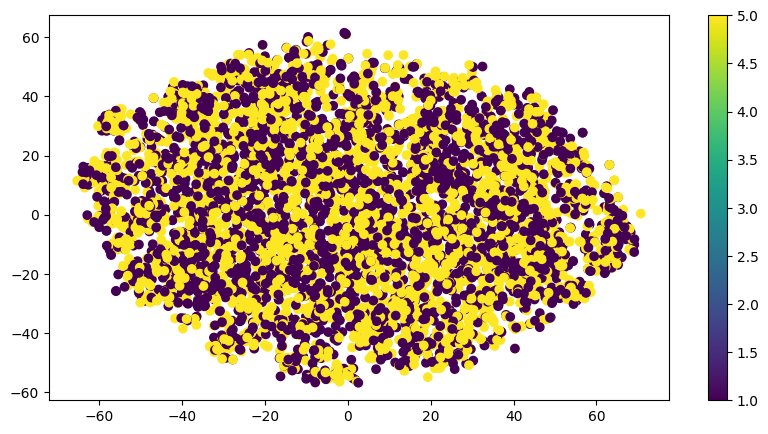

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(X)

# For visualization (optional)
x_axis = transformed_data[:, 0]
y_axis = transformed_data[:, 1]

plt.figure(figsize=(10, 5))
plt.scatter(x_axis, y_axis, c=y)
plt.colorbar()
plt.show()

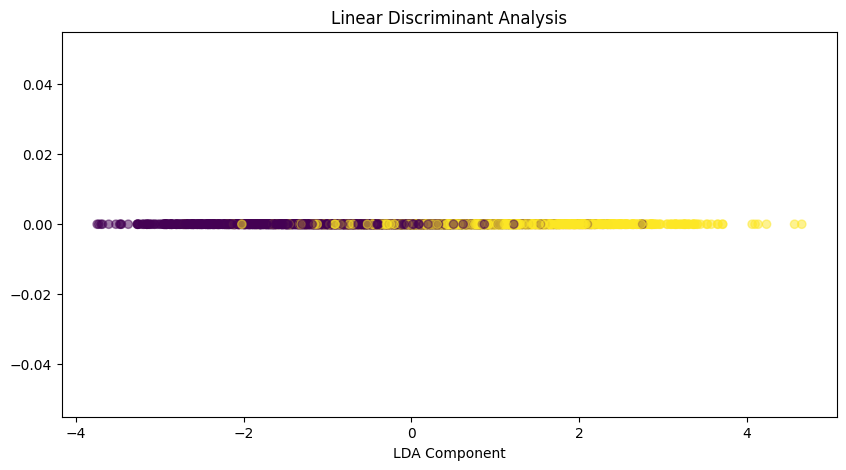

In [46]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Apply LDA
lda = LDA(n_components=1)
transformed_data = lda.fit_transform(X, y)

# For visualization (optional)
plt.figure(figsize=(10, 5))
plt.scatter(transformed_data, np.zeros_like(transformed_data), c=y, alpha=0.5)
plt.xlabel('LDA Component')
plt.title('Linear Discriminant Analysis')
plt.show()


In [44]:
y_pred = lda.predict(X)
np.mean(y_pred == y)

0.7529133592298598

In [45]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# Apply LDA
lda = LDA(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.93%
